<a href="https://colab.research.google.com/github/JamesGilJGBS/Portifolio/blob/main/SEO/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# siemprenina

SEO(Search Engine Optimization) para loja virtual acessórios femininos siemprenina.com.br

Análise do Google Trends de palavras chaves e ocorrências geográficas.
Itens de análise: laço, tiara, turbante, pulseira, maquiagem.

Proposta de análise:
  1. Tendências de busca do dia no Brasil, qualquer tema.
  2. Comparativo de busca dos itens propostos no Brasil no últimos doze meses.
  3. Palavras CHaves, sazonalidade e geografia dos itens propostos de 2016 à 2021.

Essa análise gera uma visão para promoções diárias dos temas recorrentes no dia, bem como a distribuição de estoque de acordo com a sazonalidade, possíveis padrões de consumo pela distribuição ao longo do ano e regionalidade.

Gera também palavras chaves relacionadas para inserção em títulos h1 e h2 de produtos páginas e links.

## Bibliotecas:

In [1]:
!pip install pytrends
!pip install pyodbc
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()

import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

import requests
import pyodbc
import hashlib
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

import json

## Tendências do dia no Brasil.

In [3]:
# Get Google Hot Trends data
print('Tendências do Dia: Hot Trends')
today_searches_df = pytrends.today_searches(pn='BR')
print(today_searches_df)

Tendências do Dia: Hot Trends
0              Devin Booker
1         Rua do Medo: 1978
2            Hugo Rodallega
3             Florence pugh
4    Vacina Janssen reações
5           Mariana Ximenes
6             Thyane Dantas
Name: query, dtype: object


## Busca Palavras Chaves.

In [4]:
termo1 = 'laço'
termo2 = 'tiara'
termo3 = 'turbante'
termo4 = 'pulseira'
termo5 = 'maquiagem'

In [5]:
# Trend
pytrends.build_payload(kw_list=[termo1, termo2, termo3, termo4, termo5], timeframe='2020-01-01 2021-07-30', geo='BR') 
df_rq = pytrends.related_queries()
print('Assuntos mais pesquisados:')

# Display df_rq
print(df_rq)

Assuntos mais pesquisados:
{'laço': {'top':                             query  value
0                      fazer laço    100
1                       laço fita     96
2                 como fazer laço     84
3                    laço de fita     81
4                  menina de laço     35
5                    laço de amor     33
6                  laço de cabelo     30
7                 um laço de amor     27
8                           laços     27
9                       laço rosa     26
10             fazer laço de fita     25
11                  laço com fita     24
12        como fazer laço de fita     23
13  menina bonita do laço de fita     21
14                  laço de cetim     21
15                 fita para laço     20
16                           laco     20
17                     molde laço     19
18                  laço infantil     19
19                  laço boutique     17
20                       laço png     16
21               laço para cabelo     14
22           

## Comparativo entre os itens

In [6]:
kw_list = [termo1, termo2, termo3, termo4, termo5]
kw_group = list(zip(*[iter(kw_list)]*1))
print(kw_group)

[('laço',), ('tiara',), ('turbante',), ('pulseira',), ('maquiagem',)]


In [7]:
kw_grplist = [list(x) for x in kw_group]
print(kw_grplist)

[['laço'], ['tiara'], ['turbante'], ['pulseira'], ['maquiagem']]


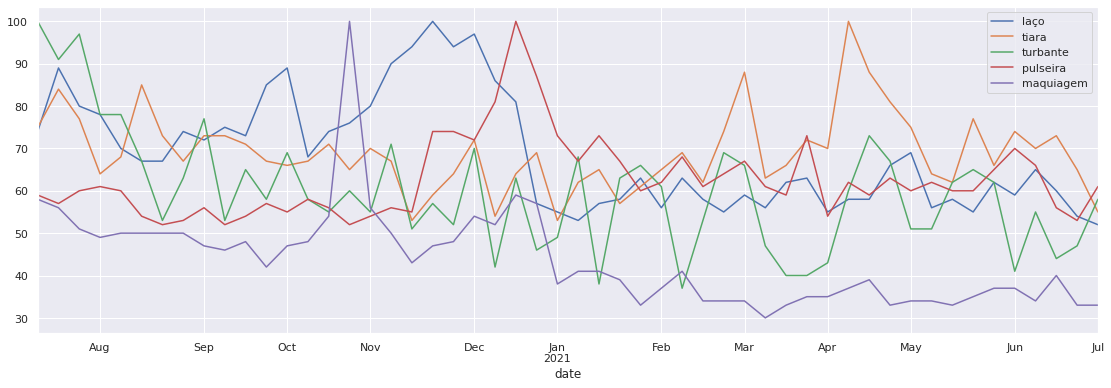

In [8]:
trendshow = TrendReq(hl='pt-BR', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m', geo='BR')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe.plot(kind='line', stacked=False, figsize=(19,6))

## Gráfico de busca de "laço" por estado.

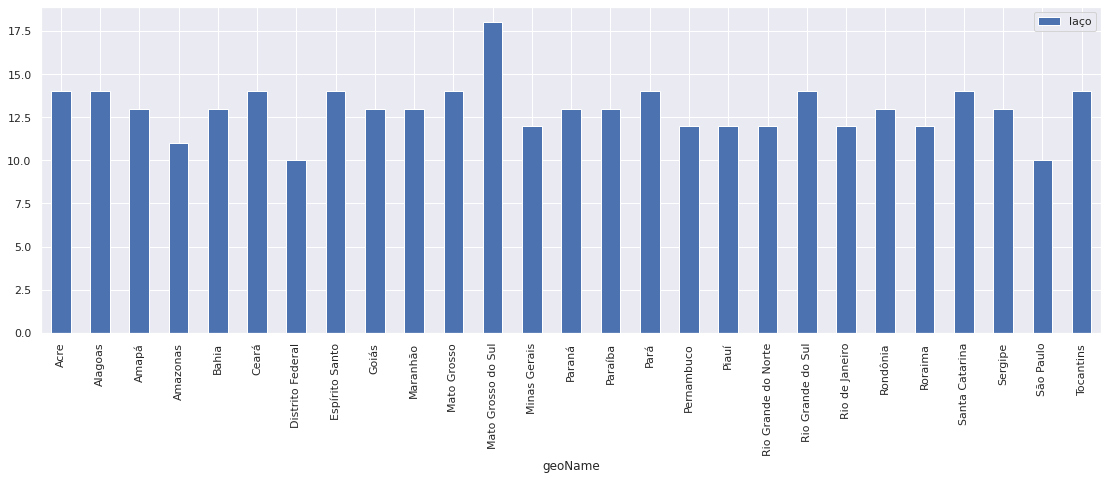

In [9]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo1, figsize = (19, 6), kind = 'bar')

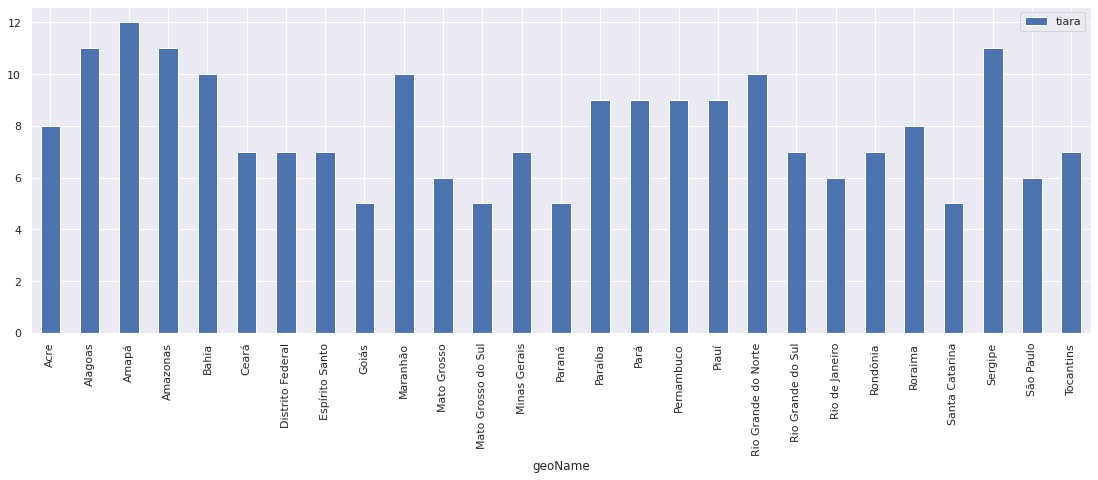

In [10]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo2, figsize = (19, 6), kind = 'bar')

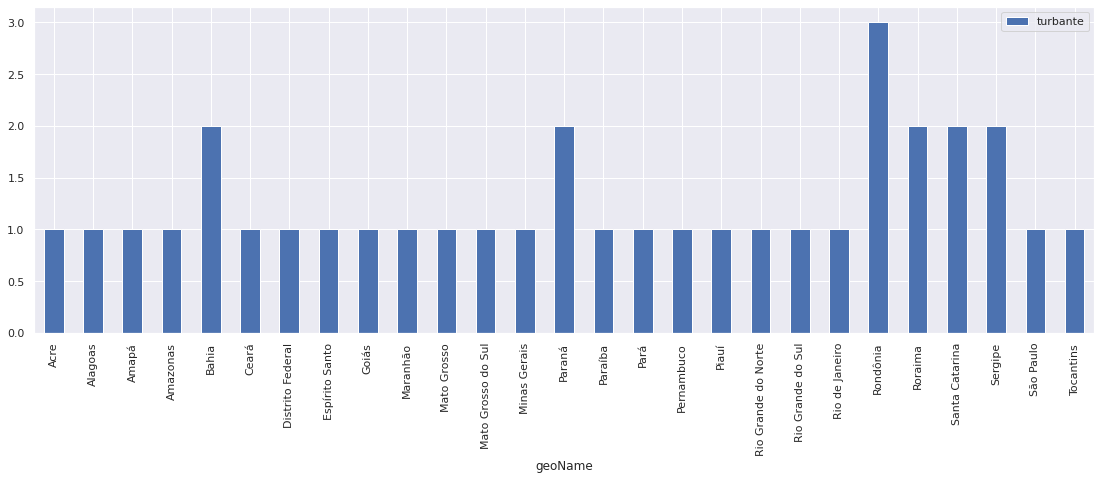

In [11]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo3, figsize = (19, 6), kind = 'bar')

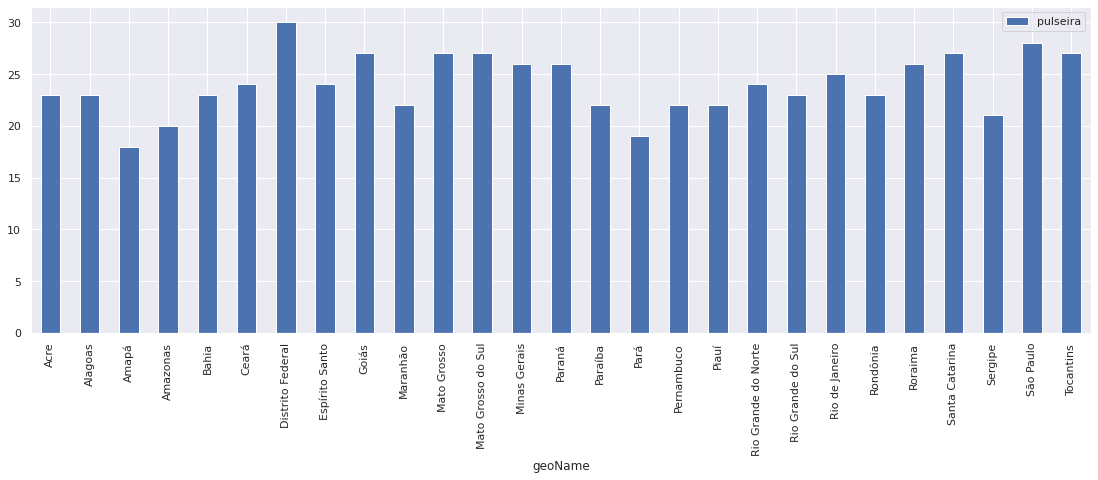

In [12]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo4, figsize = (19, 6), kind = 'bar')

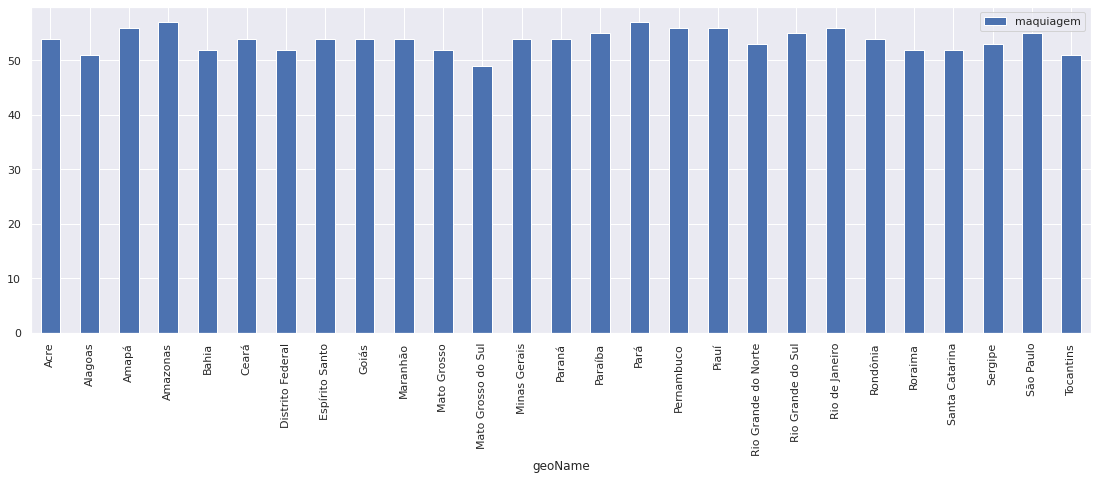

In [13]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo5, figsize = (19, 6), kind = 'bar')

## Gráfico de busca de "laço" por período.

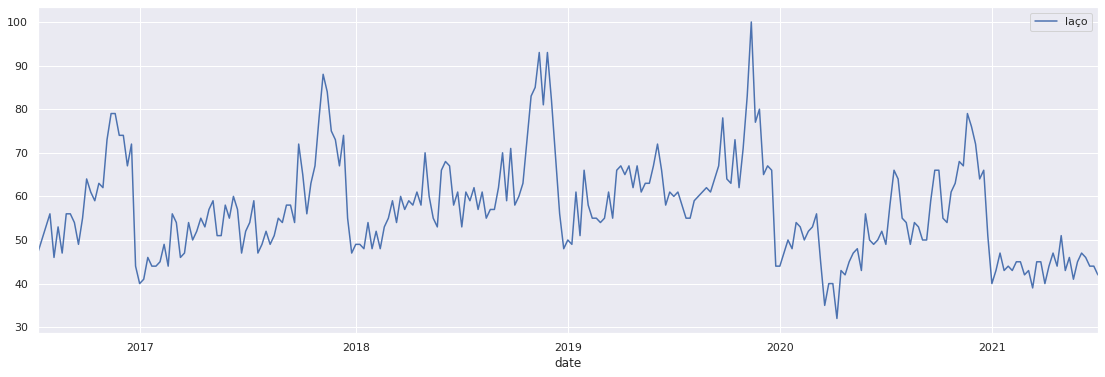

In [14]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo1])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo1], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Gráfico de busca de "tiara" por período.

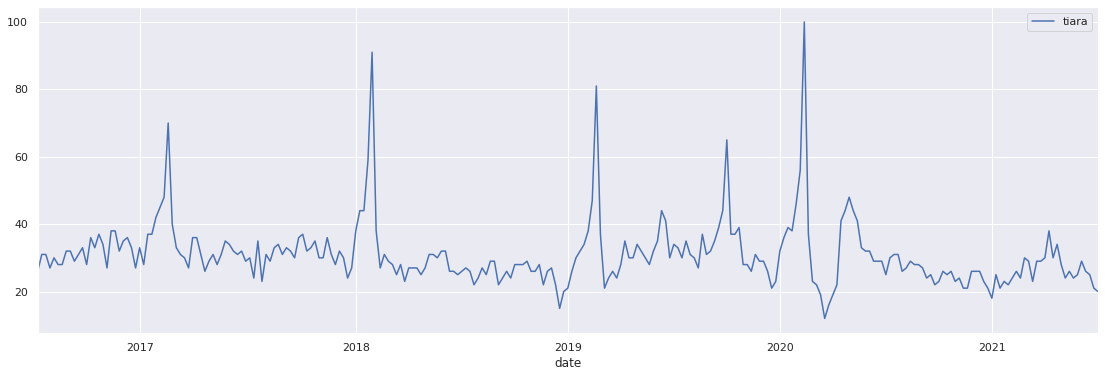

In [15]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo2])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo2], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Gráfico de busca de "turbante" por período.

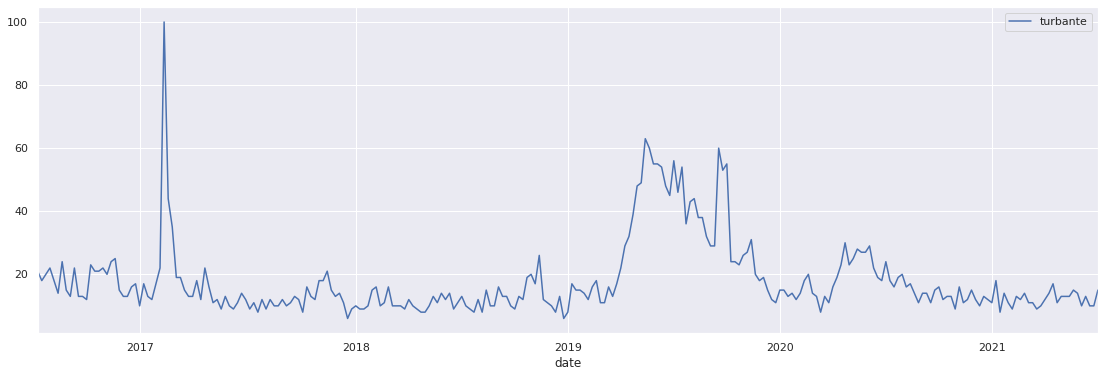

In [16]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo3])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo3], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

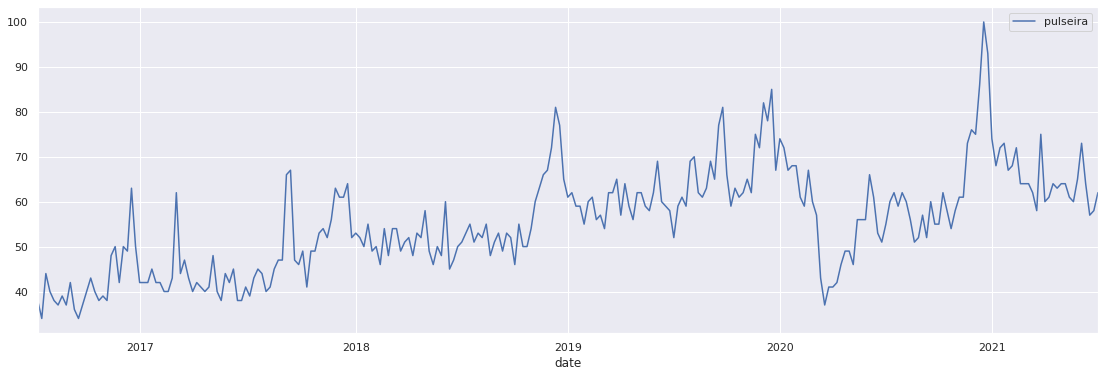

In [17]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo4])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo4], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

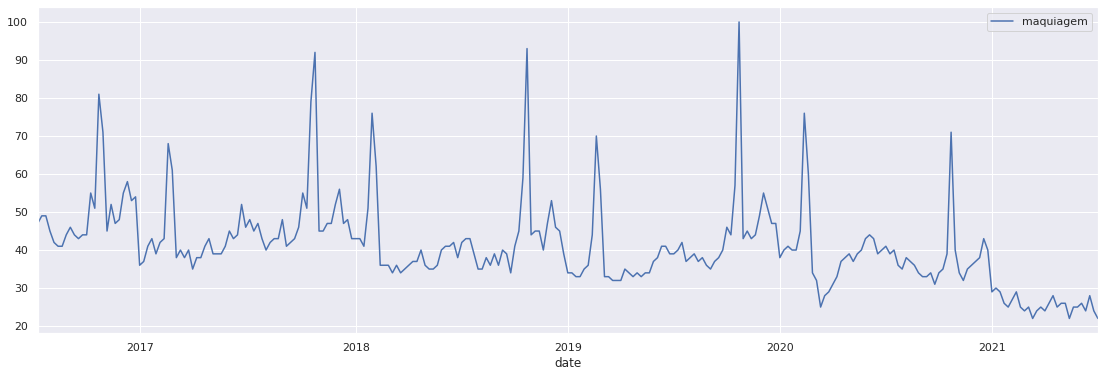

In [18]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo5])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo5], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))